In [1]:
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(y_train)
df.head()

,0
0,6
1,9
2,9
3,4
4,1


In [8]:
df[0].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

In [9]:
y_train.ravel()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
y_test, y_train = y_test.ravel(), y_train.ravel()

In [11]:
y_train.shape

(50000,)

In [12]:
labels = ['airplane',
          'car',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck'
          ]

In [13]:
labels_dict = {i: label for i, label in enumerate(labels)}

In [14]:
labels_dict

{0: 'airplane',
 1: 'car',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [15]:
import matplotlib.pyplot as plt

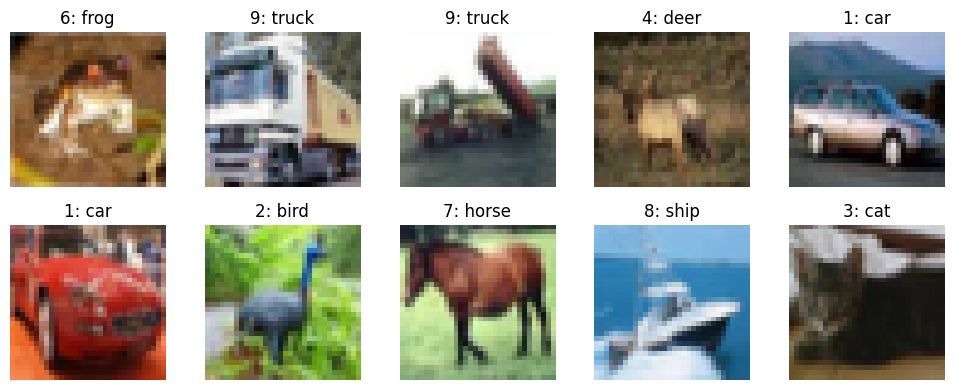

In [20]:
fig, axes = plt.subplots(2, 5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title(f'{y_train[i]}: {labels[y_train[i]]}')
    fig.tight_layout()

In [21]:
scaled_X_train = X_train.astype('float32') / 255
scaled_X_test = X_test.astype('float32') / 255

In [22]:
from keras import layers

In [23]:
def CNN_model(learning_rate = 0.001, drop_rate = 0.5, kernels=[32, 64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model = keras.Sequential(name='CNN')
    for kern in kernels:
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation = 'relu', kernel_initializer = 'he_normal',
                                   input_shape = X_train.shape[1:])
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size = 2, strides = 2))

    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation = 'relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [24]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

d:\TeachMe\DATA Sci\IT Högsk\GitHub\Machine_Learning-Mary-Kavalionak\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [28]:
early_stopper = EarlyStopping(monitor = 'val_loss', patience = 9, mode = 'min')

model.fit(scaled_X_train, y_train, epochs =100, callbacks = [early_stopper], validation_split = 0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1881 - loss: 2.1531 - val_accuracy: 0.4481 - val_loss: 1.5185
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4273 - loss: 1.5427 - val_accuracy: 0.5345 - val_loss: 1.2966
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5026 - loss: 1.3678 - val_accuracy: 0.5880 - val_loss: 1.1662
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5344 - loss: 1.2712 - val_accuracy: 0.5668 - val_loss: 1.1879
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5600 - loss: 1.2163 - val_accuracy: 0.6298 - val_loss: 1.0704
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5848 - loss: 1.1495 - val_accuracy: 0.6349 - val_loss: 1.0411
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5931 - loss: 1.1264 - val_accuracy: 0.6500 - val_loss: 0.9971
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 

In [29]:
import pandas as pd

In [30]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.268375,1.939015,0.4481,1.518469
1,0.449300,1.495233,0.5345,1.296630
2,0.507375,1.350523,0.5880,1.166206
3,0.538900,1.261636,0.5668,1.187950
4,0.567200,1.202245,0.6298,1.070383


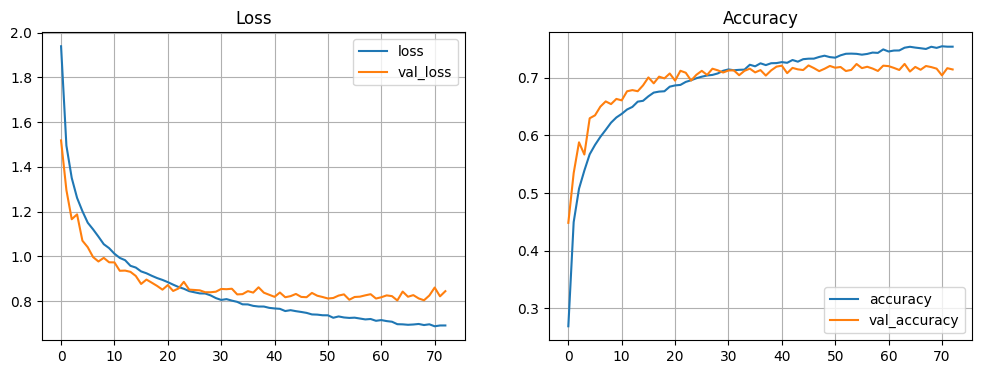

In [32]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[['loss', 'val_loss']].plot(ax = ax[0], title = 'Loss', grid = True)
    metrics[['accuracy', 'val_accuracy']].plot(ax = ax[1], title = 'Accuracy', grid = True)

plot_metrics(metrics)

In [37]:
early_stopper = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train, y_train, validation_split = 1/6, epochs = 30, callbacks = [early_stopper])
    
    metrics = pd.DataFrame (model.history.history)

    val_acc = metrics['val_accuracy'].iloc[-1]

    return val_acc

In [34]:
import numpy as np

In [38]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)

Epoch 1/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.3868 - loss: 1.7118 - val_accuracy: 0.5743 - val_loss: 1.1965
Epoch 2/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6062 - loss: 1.1156 - val_accuracy: 0.6296 - val_loss: 1.0481
Epoch 3/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6688 - loss: 0.9390 - val_accuracy: 0.6350 - val_loss: 1.0607
Epoch 4/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7216 - loss: 0.8076 - val_accuracy: 0.6860 - val_loss: 0.9392
Epoch 5/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7688 - loss: 0.6749 - val_accuracy: 0.6867 - val_loss: 0.9435
Epoch 6/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.7994 - loss: 0.5729 - val_accuracy: 0.6915 - val_loss: 0.9652
Epoch 7/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8352 - loss: 0.4736 - val_accuracy: 0.6982 - val_loss: 0.9713
Epoch 1/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.4042 -

In [39]:
dropout_accuracies

{np.float64(0.1): np.float64(0.6982241272926331),
 np.float64(0.2): np.float64(0.7165826559066772),
 np.float64(0.30000000000000004): np.float64(0.6741060614585876),
 np.float64(0.4): np.float64(0.6833453178405762),
 np.float64(0.5): np.float64(0.6677466034889221)}

In [40]:
model_final = CNN_model(drop_rate = .2)

model_final.fit(scaled_X_train, y_train, epochs = 20)



d:\TeachMe\DATA Sci\IT Högsk\GitHub\Machine_Learning-Mary-Kavalionak\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4147 - loss: 1.6272
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6127 - loss: 1.1007
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6791 - loss: 0.9145
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7272 - loss: 0.7835
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7677 - loss: 0.6598
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8039 - loss: 0.5658
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.8282 - loss: 0.4906
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8476 - loss: 0.4271
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8703 - loss: 0.3697
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8890 - loss: 0.3159
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9005 - loss: 0.2812
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.65      0.72      1000
           1       0.91      0.79      0.85      1000
           2       0.68      0.56      0.61      1000
           3       0.54      0.47      0.50      1000
           4       0.62      0.66      0.64      1000
           5       0.67      0.58      0.62      1000
           6       0.66      0.84      0.74      1000
           7       0.63      0.79      0.70      1000
           8       0.82      0.81      0.81      1000
           9       0.75      0.87      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'car'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

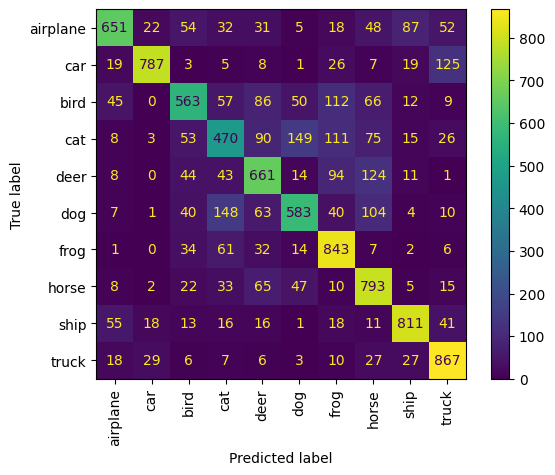

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)

y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = labels).plot()
plt.xticks(rotation = 90)